In [51]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [52]:
pwd

'C:\\Users\\ABC\\6. Datasets'

In [53]:
os.chdir('C:\\Users\\ABC\\6. Datasets')

In [54]:
os.listdir()

['.ipynb_checkpoints',
 '42E17330',
 '8qxce0lddu.xlsx',
 'Adventure Works - Tableau Module 8 copy.csv',
 'archive',
 'archive.zip',
 'ARM - Bakery Data',
 'ARM - Bakery Data.zip',
 'ARM - Bakery.csv',
 'Aug 2023 - Nov 6th 2023.xls',
 'bank-full.csv',
 'bank_cleaned (2).csv',
 'bank_cleaned (3).csv',
 'bank_cleaned.csv',
 'BigMartSalesData.csv',
 'BostonHousing.csv',
 'BostonHousing2.csv',
 'breast cancer - LogReg.csv',
 'BX-Book-Ratings.csv',
 'BX-Books.csv',
 'BX-Users.csv',
 'CarPrice_Assignment.csv',
 'Cars2015.csv',
 'cereal.csv',
 'CityTemps.csv',
 "code - Nikita mam's code.ipynb",
 'Code module 8.ipynb',
 'CoffeeChart2.xlsx',
 'Concrete_Data_Yeh.csv',
 'Concrete_Data_Yeh2 - To test.csv',
 'Credit Card Customer Data.csv',
 'Data Dictionary - carprices.xlsx',
 'diabetes.csv',
 'DSScoreTerm1.csv',
 'emails.csv',
 'EmailsNotepad.txt',
 'f1 - 1',
 'FyntraCustomerData.csv',
 'Groceries_dataset.csv',
 'HDFC Aug 2023 - Nov 6th 2023.pdf',
 'heart (1) - LogReg.csv',
 'heart - LogReg.csv',


In [55]:
df = pd.read_csv('heart (1) - LogReg.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [56]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [58]:
ss = StandardScaler()

In [59]:
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

In [60]:
pca = PCA(n_components=13)

In [61]:
x_train_pca = pca.fit_transform(x_train_ss)
x_test_pca = pca.transform(x_test_ss)

In [62]:
lr = LogisticRegression()

In [63]:
model = lr.fit(x_train_pca,y_train)
y_predict = lr.predict(x_test_pca)

In [64]:
cc = confusion_matrix(y_predict, y_test)
cc

array([[79,  7],
       [24, 95]], dtype=int64)

In [65]:
acc = accuracy_score(y_predict, y_test)
acc

0.848780487804878

In [66]:
ev = pca.explained_variance_
ev

array([2.747905  , 1.57671953, 1.20644825, 1.17875128, 1.00725854,
       0.95638888, 0.87271936, 0.75670726, 0.7183093 , 0.64606386,
       0.53552059, 0.43976894, 0.37331224])

In [67]:
cum = np.cumsum(ev)/np.sum(ev)
cum

array([0.21111953, 0.33225774, 0.42494827, 0.51551087, 0.59289781,
       0.66637647, 0.73342686, 0.79156412, 0.8467513 , 0.89638791,
       0.93753157, 0.97131869, 1.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

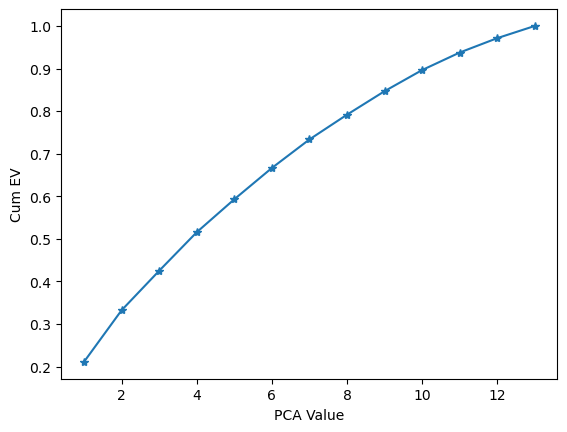

In [73]:
plt.plot(range(1,len(ev)+1), cum, marker = "*")
plt.xlabel('PCA Value')
plt.ylabel('Cum EV')
plt.show

In [70]:
threshold = 0.85
selected_pca = np.argmax(cum >= threshold) + 1
selected_pca

10